In [116]:
import pandas as pd
import numpy as np
from datetime import date 
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [117]:
df_covid_county =  pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
print(df_covid_county)

              date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1       0
1       2020-01-22   Snohomish  Washington  53061.0      1       0
2       2020-01-23   Snohomish  Washington  53061.0      1       0
3       2020-01-24        Cook    Illinois  17031.0      1       0
4       2020-01-24   Snohomish  Washington  53061.0      1       0
...            ...         ...         ...      ...    ...     ...
382762  2020-07-29  Sweetwater     Wyoming  56037.0    234       2
382763  2020-07-29       Teton     Wyoming  56039.0    318       1
382764  2020-07-29       Uinta     Wyoming  56041.0    245       1
382765  2020-07-29    Washakie     Wyoming  56043.0     44       5
382766  2020-07-29      Weston     Wyoming  56045.0      5       0

[382767 rows x 6 columns]


In [118]:
print(df_covid_county.isnull().sum())

date         0
county       0
state        0
fips      3845
cases        0
deaths       0
dtype: int64


In [119]:
df_covid_county['fips'].fillna(0,inplace=True)

In [120]:
print(df_covid_county.isnull().sum())

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64


2020-07-29 00:00:00


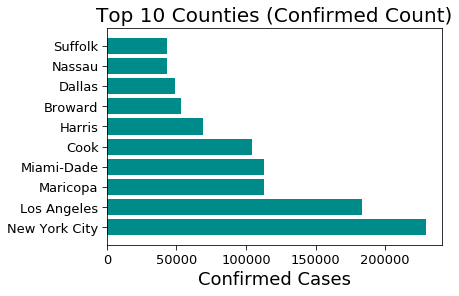

In [128]:
df_covid_county['date'] = pd.to_datetime(df_covid_county['date'])  
today = pd.Timestamp('today').normalize()
yesterday = today - timedelta(days = 1) 
print(yesterday)
mask = (df_covid_county['date'] == yesterday)
df = df_covid_county.loc[mask]

confirmed_cases= df.nlargest(10,'cases')
plt.barh(confirmed_cases['county'],confirmed_cases['cases'],color="darkcyan")
plt.xlabel("Confirmed Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties (Confirmed Count)",fontsize=20)

plt.show()

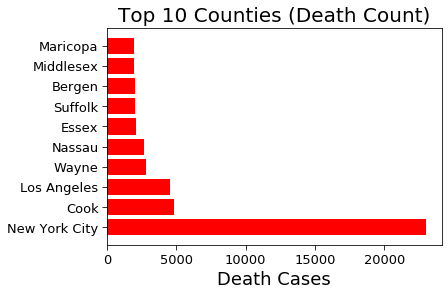

In [129]:
death_cases= df.nlargest(10,'deaths')
plt.barh(death_cases['county'],death_cases['deaths'],color="Red")
plt.xlabel("Death Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties (Death Count)",fontsize=20)

plt.show()

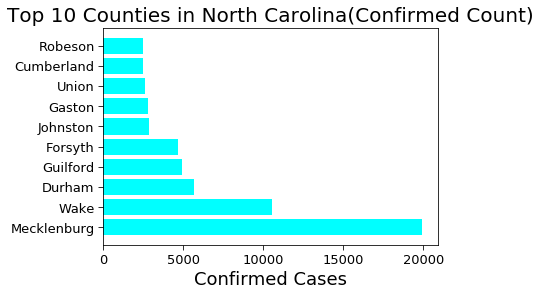

In [130]:
maskOne = (df['state'] == "North Carolina")
df = df.loc[maskOne]

confirmed_cases= df.nlargest(10,'cases')
plt.barh(confirmed_cases['county'],confirmed_cases['cases'],color="cyan")
plt.xlabel("Confirmed Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties in North Carolina(Confirmed Count)",fontsize=20)

plt.show()

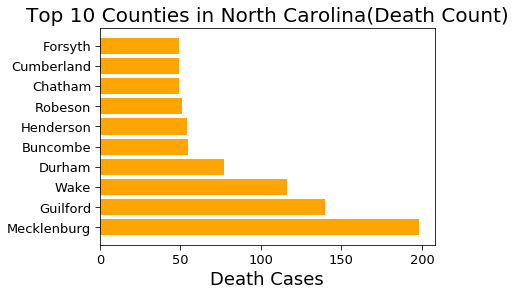

In [131]:
maskOne = (df['state'] == "North Carolina")
df = df.loc[maskOne]

confirmed_cases= df.nlargest(10,'deaths')
plt.barh(confirmed_cases['county'],confirmed_cases['deaths'],color="orange")
plt.xlabel("Death Cases",fontsize=18)
plt.tick_params(size=5,labelsize = 13)
plt.title("Top 10 Counties in North Carolina(Death Count)",fontsize=20)

plt.show()

In [132]:
maskState = (df_covid_county['state'] == "North Carolina")
maskCounty = (df_covid_county['county'] == "Mecklenburg")
df_state = df_covid_county.loc[maskState]
df_county = df_state.loc[maskCounty]

# /* Getting day-day values of covid cases*/

i = np.arange(len(df_county))
j = np.arange(2)

a = np.where(
    (i[:, None] + j) % 2 == 0, 1, -1
) * df_county.cases.values[:, None]

b = a.cumsum(0)[i, i % 2]

c = np.where(
    (i[:, None] + j) % 2 == 0, 1, -1
) * df_county.deaths.values[:, None]

d = c.cumsum(0)[i, i % 2]

df_ne_county = df_county.assign(cases=b)
df_new_county = df_county.assign(deaths=d)

print(df_new_county.head(20))


            date       county           state     fips  cases  deaths
1532  2020-03-12  Mecklenburg  North Carolina  37119.0      2       0
1826  2020-03-13  Mecklenburg  North Carolina  37119.0      2       0
2180  2020-03-14  Mecklenburg  North Carolina  37119.0      2       0
2592  2020-03-15  Mecklenburg  North Carolina  37119.0      4       0
3054  2020-03-16  Mecklenburg  North Carolina  37119.0      4       0
3574  2020-03-17  Mecklenburg  North Carolina  37119.0      7       0
4181  2020-03-18  Mecklenburg  North Carolina  37119.0     11       0
4912  2020-03-19  Mecklenburg  North Carolina  37119.0     13       0
5766  2020-03-20  Mecklenburg  North Carolina  37119.0     28       0
6763  2020-03-21  Mecklenburg  North Carolina  37119.0     41       0
7865  2020-03-22  Mecklenburg  North Carolina  37119.0     66       0
9066  2020-03-23  Mecklenburg  North Carolina  37119.0     80       0
10374 2020-03-24  Mecklenburg  North Carolina  37119.0    104       0
11818 2020-03-25  Me

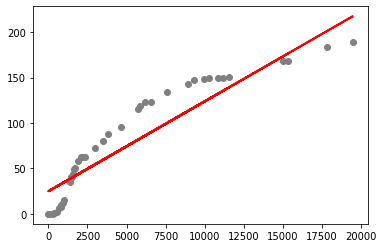

In [133]:
X = df_county['cases'].values.reshape(-1,1)
y = df_county['deaths'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()  

# print(regressor.intercept_)
# #For retrieving the slope:
# print(regressor.coef_)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

dftest = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = dftest.head(25)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

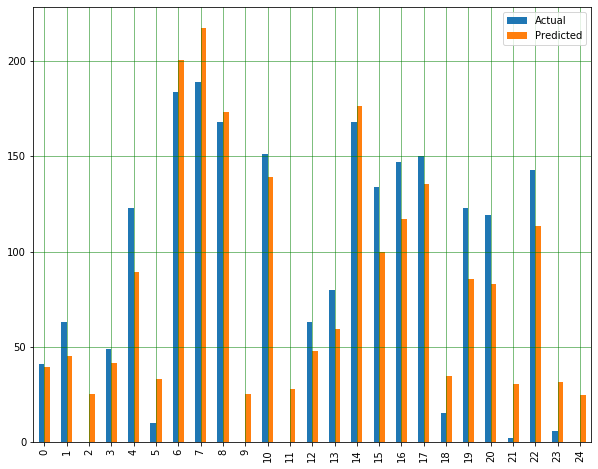

In [134]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()